# Getting Connected

In [1]:
!pip install Twython

In [2]:
from twython import Twython, TwythonError

In [4]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [26]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=VgZ8zwAAAAABTgzqAAABe8_mzk8


In [27]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '2243897'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

In [28]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'contributors_enabled': False,
 'created_at': 'Mon Jan 21 16:46:20 +0000 2019',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Não leve a sério este perfil!',
 'entities': {'description': {'urls': []}},
 'favourites_count': 5065,
 'follow_request_sent': False,
 'followers_count': 111,
 'following': False,
 'friends_count': 132,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 1087390950119391237,
 'id_str': '1087390950119391237',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 0,
 'location': 'Natal, Brasil',
 'name': 'Idoso 🐐',
 'needs_phone_verification': False,
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1087390950119391237/1567740514',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/117044

# Getting Data

In [29]:
search_response = twitter.search(q='#dev', count=100)

In [30]:
search_response

{'search_metadata': {'completed_in': 0.144,
  'count': 100,
  'max_id': 1436320806393585665,
  'max_id_str': '1436320806393585665',
  'next_results': '?max_id=1436310534941519876&q=%23dev&count=100&include_entities=1',
  'query': '%23dev',
  'refresh_url': '?since_id=1436320806393585665&q=%23dev&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Fri Sep 10 13:29:00 +0000 2021',
   'entities': {'hashtags': [{'indices': [27, 35], 'text': 'growing'},
     {'indices': [47, 54], 'text': 'hiring'},
     {'indices': [91, 110], 'text': 'employeeengagement'},
     {'indices': [115, 125], 'text': 'wellbeing'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 1312741393115369472,
      'id_str': '1312741393115369472',
      'indices': [3, 14],
      'name': 'Eletive',
      'screen_name': 'EletiveCom'}]},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   'id': 1436320806393585

In [31]:
# current limits to followers/list endpoint
twitter.get_application_rate_limit_status()['resources']["search"]

{'/search/tweets': {'limit': 180, 'remaining': 167, 'reset': 1631281012}}

In [32]:
# there are some rate limitations in order to use the Twitter API
# you can see the current limits calling get_applicaiton_rate_limit_status()
twitter.get_application_rate_limit_status()['resources']

{'account': {'/account/authenticate_web_view': {'limit': 50,
   'remaining': 50,
   'reset': 1631281539},
  '/account/change_password': {'limit': 15,
   'remaining': 15,
   'reset': 1631281539},
  '/account/login_verification_enrollment': {'limit': 15,
   'remaining': 15,
   'reset': 1631281539},
  '/account/settings': {'limit': 15, 'remaining': 15, 'reset': 1631281539},
  '/account/update_profile': {'limit': 15,
   'remaining': 15,
   'reset': 1631281539},
  '/account/verify_credentials': {'limit': 75,
   'remaining': 73,
   'reset': 1631280919}},
 'account_activity': {'/account_activity/all/:instance_name/subscriptions': {'limit': 500,
   'remaining': 500,
   'reset': 1631281539},
  '/account_activity/all/:instance_name/webhooks': {'limit': 15,
   'remaining': 15,
   'reset': 1631281539},
  '/account_activity/all/webhooks': {'limit': 15,
   'remaining': 15,
   'reset': 1631281539},
  '/account_activity/direct_messages/:instance_name/subscriptions': {'limit': 15,
   'remaining': 15,
 

In [33]:
search_tweets = search_response['statuses']
tweet = search_tweets[0]
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Sep 10 13:29:00 +0000 2021',
 'entities': {'hashtags': [{'indices': [27, 35], 'text': 'growing'},
   {'indices': [47, 54], 'text': 'hiring'},
   {'indices': [91, 110], 'text': 'employeeengagement'},
   {'indices': [115, 125], 'text': 'wellbeing'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1312741393115369472,
    'id_str': '1312741393115369472',
    'indices': [3, 14],
    'name': 'Eletive',
    'screen_name': 'EletiveCom'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1436320806393585665,
 'id_str': '1436320806393585665',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 1,
 'retweeted': False,
 'retweeted_status': {'contributors

In [34]:
tweet['user']

{'contributors_enabled': False,
 'created_at': 'Thu Dec 13 10:11:44 +0000 2018',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Helping #SaaS and #Tech companies \u200bgrow with strategic #contentmarketing\u200b | Head of Marketing @eletive | Founder @Contechi',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'contechi.com',
     'expanded_url': 'http://contechi.com',
     'indices': [0, 23],
     'url': 'https://t.co/RuCnrSn6MK'}]}},
 'favourites_count': 278,
 'follow_request_sent': False,
 'followers_count': 207,
 'following': False,
 'friends_count': 379,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 1073158522123239425,
 'id_str': '1073158522123239425',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 5,
 'location': '',
 'name': 'Nina Quist | B2B & SaaS Marketing',
 'notifications': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'htt

In [35]:
# even with count=1000, we still get at most 100 tweets
search_response = twitter.search(q='#dev', count=1000)
len(search_response['statuses'])

100

In [36]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#dev', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

1000

## Organizing data

In [37]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for tweet in search_tweets:
    dict_['user'].append(tweet['user']['screen_name'])
    dict_['date'].append(tweet['created_at'])
    dict_['text'].append(tweet['text'])
    dict_['favorite_count'].append(tweet['favorite_count'])
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

In [38]:
df.head()

,user,date,text,favorite_count
0,KTVTAMIL,Fri Sep 10 03:30:00 +0000 2021,Itha Follow Pannunga Life Semaya Irukkum\n\n#D...,25
1,Discovertech3,Fri Sep 10 13:30:45 +0000 2021,RT @Python_News: A live profiling and inspecti...,0
2,Python_News,Fri Sep 10 13:30:32 +0000 2021,A live profiling and inspection tool for the D...,0
3,contechi,Fri Sep 10 13:29:00 +0000 2021,"RT @EletiveCom: Eletive is #growing, and we're...",0
4,wdiego,Fri Sep 10 13:28:58 +0000 2021,RT @P_Ensarguet: Open-source software starts w...,0


In [39]:
df.shape

(1000, 4)

In [ ]:
# save to a csv file
#df.to_csv(username+"-"+datestamp+".csv")

# Creating Graph

In [40]:
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 156, 'reset': 1631281012}}

In [42]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

852

In [ ]:
# a retweet
retweets[0]

In [44]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

# Analyzing Graph

In [45]:
max(D.nodes, key=D.out_degree)

'PrUkkera'

In [46]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('PrUkkera', 65),
 ('programmerjoke9', 35),
 ('_ArifChaudhary', 25),
 ('_r8lst', 25),
 ('Python_News', 24)]

In [47]:
D.out_degree()

OutDegreeView({'Python_News': 24, 'Discovertech3': 0, 'EletiveCom': 1, 'contechi': 0, 'P_Ensarguet': 1, 'wdiego': 0, '_ArifChaudhary': 25, 'godfrey_G_': 0, 'CryptofAI': 2, 'GrandeMaestro': 0, 'Varun_dvn': 1, 'jashul_x_divya': 0, 'PrUkkera': 65, '_reactdev': 0, 'leonvioleta4': 4, 'education_24x7': 0, 'bot_tensorflow': 0, 'MichalOktabec': 3, 'ctvrtkon': 0, 'hlavacm': 0, 'GamebotIndie': 0, 'barbrielart': 1, 'devvibesbot': 0, 'gaby_wald': 1, 'Fishbot8': 0, 'CoderRetweet': 0, 'ShyBOT7': 0, 'hubofml': 0, 'fluttbot': 0, 'opensource_orgs': 0, 'TheSecretJunio1': 0, 'Braverider2': 5, 'RibRab7': 0, 'GamesJackhammer': 0, 'codedailybot': 0, 'xaelbot': 0, 'datasciencebot_': 0, 'iPythonistaBot': 0, '100DaysOf2020': 0, 'PythonRoboto': 17, 'ergomergoadargo': 9, 'Winston38463668': 0, 'sprint_code': 0, 'elizabot9': 0, 'haveyouseenhype': 0, 'vegasazure': 0, 'Lesquat_Newman': 0, 'py_data_sci': 0, 'ali19baba': 0, 'sarnayer': 8, 'Videojue_Fermin': 0, 'karthi_fan_': 1, 'ajithvijay1010': 0, 'harvest57688777': 

In [48]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('PrUkkera', 120),
 ('programmerjoke9', 71),
 ('Python_News', 66),
 ('_ArifChaudhary', 51),
 ('_r8lst', 37)]

In [49]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('AzuerBot', 39),
 ('iPythonistaBot', 31),
 ('devvibesbot', 25),
 ('codedailybot', 24),
 ('100DaysOf2020', 24)]

In [50]:
nx.is_weakly_connected(D)

False

In [51]:
nx.number_weakly_connected_components(D)

36

# Generating View

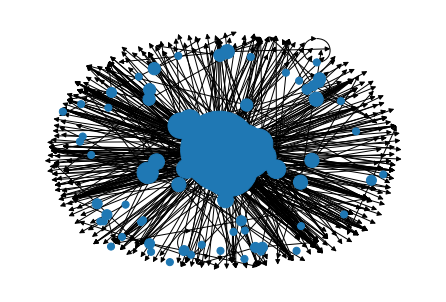

In [52]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

In [53]:
nx.write_graphml(D, "dev_community.graphml")